# Search Experiments

Notes and narrative go here.

### `generate_even_sorted_array()`

A helper function to create a list of increasing even numbers. By implication, this list is sorted.

In [1]:
def generate_even_sorted_array(size):
    array = [0] * size
    for i in range(size):
        array[i] = i * 2
    return array


### `linear_search()`

Implementation of a linear search. An iteration count is included for demo purposes and is not normally used in operational code.

In [2]:
def linear_search(array, target):
    iterations = 0
    for i, value in enumerate(array):
        iterations += 1
        if value == target:
            return i, iterations
    return -1, iterations


### `binary_search()`

Implementation of a binary search, with a iteration count added for demo purposes.

In [3]:
def binary_search(array, target):
    left = 0
    right = len(array) - 1
    iterations = 0

    while left <= right:
        iterations += 1
        mid = (left + right) // 2
        if array[mid] == target:
            return mid, iterations
        if array[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1, iterations


### `test_arrays`

These are test arrays of different sizes, derived from a base dataset, to be used in the experiments.

In [4]:
array_10m = generate_even_sorted_array(10_000_000)
test_arrays = [
    array_10m[:1_000],
    array_10m[:10_000],
    array_10m[:100_000],
    array_10m[:1_000_000],
    array_10m,
]

### `run_experiment()`

A function to execute a search function, with a given array and target.

It returns a dictionary with the fields:

| Field | Description |
|---|---|
| `func` | the name of the search function executed |
| `time` | the time taken to execute the search |
| `size` | the size of the array used in the search |
| `index` | the index of the target found by the search function, or -1 if not found |
| `iterations` | the number of iterations taken by the search function to find the target |


In [5]:
from time import perf_counter

def run_experiment(search_function, array, target):
    start_time = perf_counter()
    index, iterations = search_function(array, target)
    end_time = perf_counter()
    return {
        "func": search_function.__name__,
        "time": (end_time - start_time) * 1000,
        "size": len(array),
        "index": index,
        "iterations": iterations,
    }


### `run_experiments()`

Run a sweep over all arrays for a given search function.

| Parameter | Description |
|---|---|
| `func` | A reference to the search function to be called |
| `offset` | Used to pick a value to search from either the start of the end of the array. |
| `is_missing` | When `True`, makes the target value odd, ensuring that it will not be found, because all arrays contain even numbers only. |

In [6]:
def run_experiments(func, offset, is_missing=False):
    results = []

    for array in test_arrays:
        if offset > 0:
            # If offset is positive, target is at the offset index from the start
            target = array[offset]
        else:
            # If offset is negative, target is at the offset index from the end
            target = array[len(array) + offset]
        if is_missing:
            # Make the target missing by adding 1 (all elements are even)
            target += 1
        results.append(run_experiment(func, array, target))

    return results


## Run experiments

Execute the search functions for various scenarios and visualize the results.

In [7]:
from plot_results import plot_results

### Linear search with target found near the end

This scenario is designed to show the (near) worst-case performance of a linear search, where the target value is located near the end of the array, requiring the search to iterate through most of the elements before finding it.

The absolute worst case would be when the target is not in the array at all.

The bar chart below shows the time taken by the linear search for each array size. The iteration count is also displayed to illustrate the number of comparisons made. This visualization highlights how the linear search's performance degrades as the target is located further towards the end of the array, demonstrating its $\mathcal{O}(n)$ time complexity in this scenario.

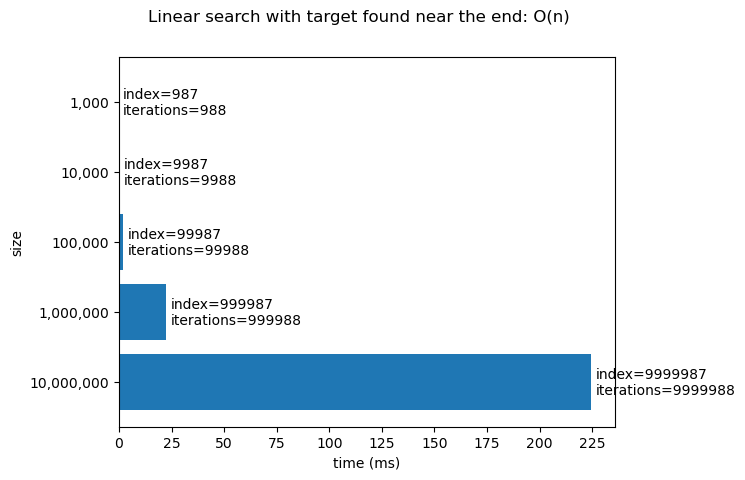

In [8]:
plot_results(run_experiments(linear_search, -13), title='Linear search with target found near the end: O(n)')

### Binary search with target found near the end

This scenario is designed to show the performance of a binary search when the target value is located near the end of the array. Since binary search operates on sorted arrays and divides the search space in half with each iteration, it should still perform far more efficiently than a linear search, even when the target is near the end.

The bar chart below shows the time taken by the binary search for each array size. The iteration count is also displayed to illustrate the number of comparisons made. This visualization highlights how the binary search's performance remains efficient, with an expectation of $\mathcal{O}(\log n)$ time complexity in this scenario. However, due to the small number of iterations (i.e., short execution time), measurement noise and the overhead of the function calls may overshadow the differences, making it difficult to observe a clear logarithmic pattern in the time taken.


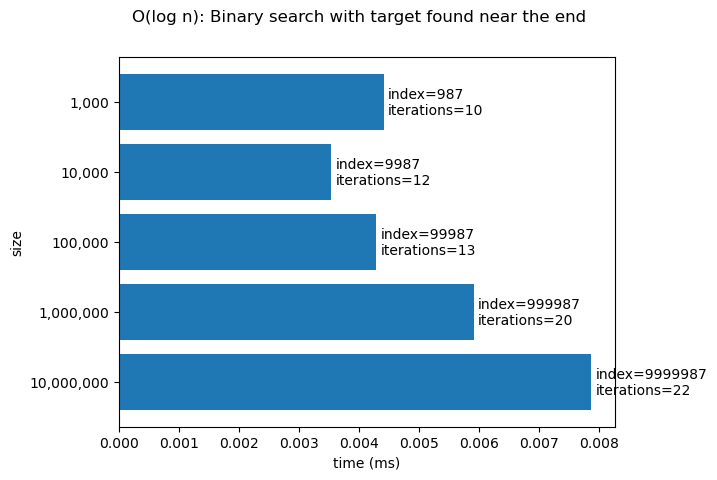

In [9]:
plot_results(run_experiments(binary_search, -13), title='O(log n): Binary search with target found near the end')

### Linear search with target found near the start.

This scenario is designed to show the (near) best-case performance of a linear search, where the target value is located near the start of the array, allowing the search to find it with minimal iterations.

The bar chart below shows the time taken by the linear search for each array size. The iteration count is low, and the chart show similar "jitter" as the binary search scenario, which is a reminder that for very short execution times, measurement noise and overhead can overshadow the differences in time taken, making it difficult to observe clear patterns.

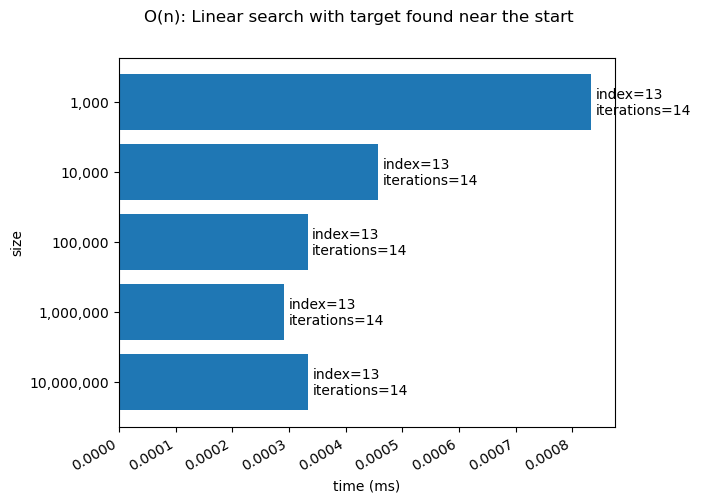

In [10]:
plot_results(run_experiments(linear_search, 13), title='O(n): Linear search with target found near the start', slant_x_ticks=True)

### Binary search with target found near the start.

Where the target is located does not meaningfully affect the performance of a binary search, as it always divides the search space in half.

For instance, for an array of size 1024, the binary search will take at most 10 iterations (worst-case) to find any target value, and 1 iteration (best-case) if the target is at the exact middle of the array.

The maximum number of iterations is determined by the logarithm base 2 of the array size, which means that for an array of size 1024, the maximum number of iterations is $\log_2(1024) = 10$, because $2^{10} = 1024$.

For our various test arrays, the maximum number of iterations for the binary search will be as follows:
| Array Size | Max Iterations (Worst-case) |
|:---:|:---:|
| 1,000 | 10 |
| 10,000 | 14 |
| 100,000 | 17 |
| 1,000,000 | 20 |
| 10,000,000 | 24 |

As you can see in the bar chart below, the number of iterations is less or equal than the maximum for the given array size, and the time taken is similar to the scenario where the target is near the end, reinforcing the fact that the position of the target does not affect the performance of a binary search.

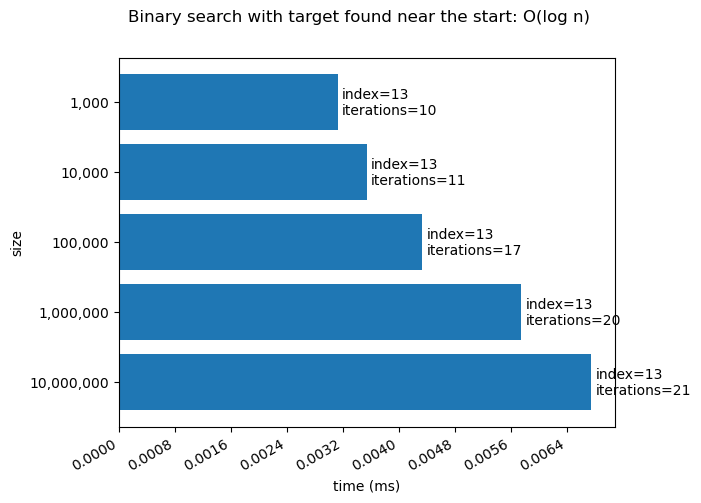

In [11]:
plot_results(run_experiments(binary_search, 13), title='Binary search with target found near the start: O(log n)', slant_x_ticks=True)

### Linear search with target not found

This scenario is designed to show the absolute worst-case performance of a linear search, where the target value is not present in the array at all. In this case, the search must iterate through every element of the array to determine that the target is not found.

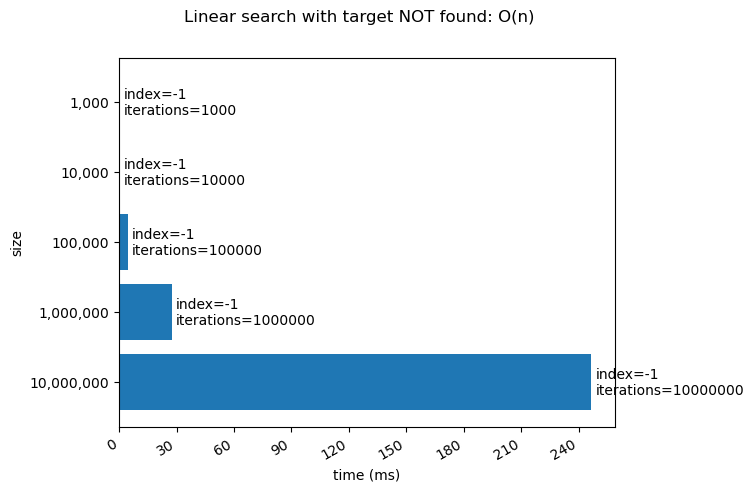

In [13]:
plot_results(run_experiments(linear_search, 13, is_missing=True), title='Linear search with target NOT found: O(n)', slant_x_ticks=True)


### Binary search with target not found.

For the binary search where the target is not found, the maximum number of iterations is still less or equal the worst-case value of the table above.

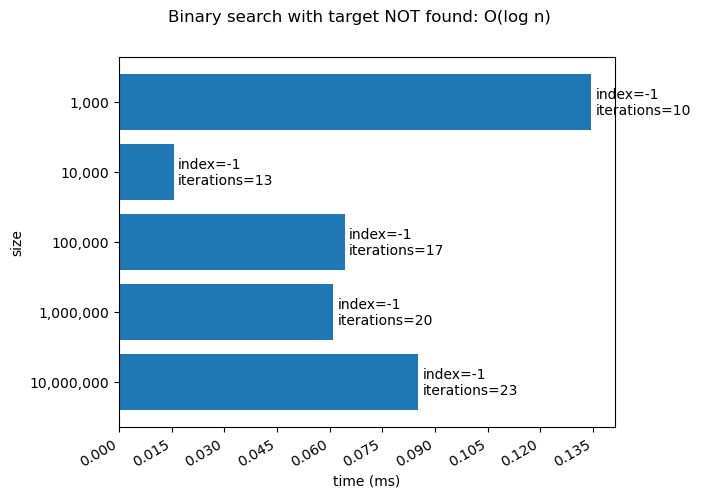

In [14]:
plot_results(run_experiments(binary_search, 13, is_missing=True), title='Binary search with target NOT found: O(log n)', slant_x_ticks=True)